<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/6-statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Statistics

This class, *Intro to Statistics*, builds on probability theory to enable us to quantify our confidence about how distributions of data are related to one another. 

Through the measured exposition of theory paired with interactive examples, you’ll develop a working understanding of all of the essential statistical tests for assessing whether data are correlated with each other or sampled from different populations -- tests which frequently come in handy for critically evaluating the inputs and outputs of machine learning algorithms. You’ll also learn how to use regression to make predictions about the future based on training data. 

The content covered in this class builds on the content of other classes in the *Machine Learning Foundations* series (linear algebra, calculus, and probability theory) and is itself foundational for the *Optimization* class. 

Over the course of studying this topic, you'll: 

* Develop an understanding of what’s going on beneath the hood of predictive statistical models and machine learning algorithms, including those used for deep learning. 
* Hypothesize about and critically evaluate the inputs and outputs of machine learning algorithms using essential statistical tools such as the t-test, ANOVA, and R-squared. 
* Use historical data to predict the future using regression models that take advantage of frequentist statistical theory (for smaller data sets) and modern machine learning theory (for larger data sets), including why we may want to consider applying deep learning to a given problem.


**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Segment 1: Review of Probability Theory*

* Frequentist vs Bayesian Statistics
* Normal Distributions
* Measures of Central Tendency 
* Quantiles
* Variance, Standard Deviation, and Standard Error
* Covariance and Correlation
* The Central Limit Theorem

*Segment 2: Quantifying Confidence*
* z-scores
* The t-test 
* p-values
* The Bonferroni Correction for Multiple Comparisons 
* ANOVA: Analysis of Variance
* Count Data and the Chi-Square Statistic
* Fitting a Line to Points on a Cartesian Plane
* The R-Squared Coefficient of Determination
* Correlation vs Causality

*Segment 3: Predicting Outcomes with Regression*

* Features: Independent vs Dependent Variables
* Linear Regression to Predict Continuous Values 
* Cost (or Loss) Functions 
* The Ordinary Least Squares Method
* Logistic Regression to Predict Categories 
* Large Data Sets, Traditional Machine Learning, and Stochastic Gradient Descent
* Overfitting
* Regularization: L1 and L2
* Deep Learning vs Frequentist Statistics
* Resources for Further Study of Probability and Statistics


## Segment 1: Frequentist Statistics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

### Measures of Central Tendency

Measures of central tendency provide a summary statistic on the center of a given distribution, a.k.a., the "average" value of the distribution.

In [3]:
from scipy.stats import skewnorm

In [4]:
x = skewnorm.rvs(10, size=1000)

In [5]:
x[0:20]

array([0.63349013, 0.04557363, 0.65040763, 1.45109873, 0.1635155 ,
       0.19382172, 1.66045054, 0.82682805, 0.36271008, 0.48660953,
       0.33003223, 0.44375653, 0.44725763, 1.97236175, 1.54362254,
       0.53980414, 1.07262315, 0.26453934, 0.93539347, 1.36308862])

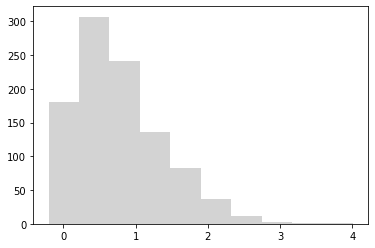

In [6]:
fig, ax = plt.subplots()
_ = plt.hist(x, color = 'lightgray')

#### Mean

The most common measure of central tendency, synonomous with the term "average", is the **mean**, often symbolized with $\mu$ (population) or $\bar{x}$ (sample):

$$ \bar{x} = \frac{\sum_{i=1}^n x_i}{n} $$

In [7]:
xbar = np.mean(x)
xbar

0.7719211854654121

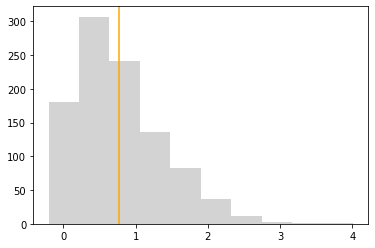

In [8]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
_ = plt.hist(x, color = 'lightgray')

#### Median

The second most common measure of central tendency is the **median**, the midpoint value in the distribution: 

In [9]:
np.median(x)

0.651420257427958

The mode is least impacted by skew, but is typically only applicable to discrete distributions. For continuous distributions with skew (e.g., salary data), median is typically the choice measure of central tendency:

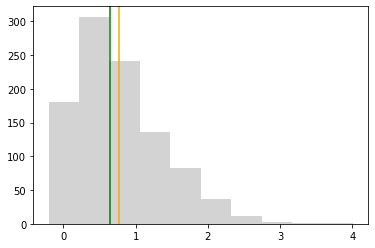

In [10]:
fig, ax = plt.subplots()
plt.axvline(x = np.mean(x), color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x, color = 'lightgray')

### Measures of Dispersion

#### Variance

$$ \sigma^2 = \frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n} $$

In [11]:
np.var(x)

0.35528419278021617

#### Standard Deviation

A straightforward derivative of variance is **standard deviation** (denoted with $\sigma$), which is convenient because its units are on the same scale as the values in the distribution: 
$$ \sigma = \sqrt{\sigma^2} $$

In [12]:
np.var(x)**(1/2)

0.5960572059628305

In [13]:
sigma = np.std(x)
sigma

0.5960572059628305

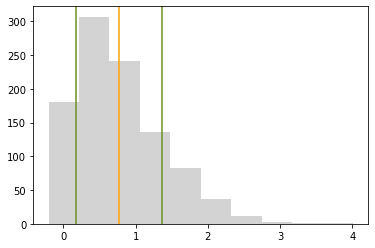

In [14]:
fig, ax = plt.subplots()
plt.axvline(x = xbar, color='orange')
plt.axvline(x = xbar+sigma, color='olivedrab')
plt.axvline(x = xbar-sigma, color='olivedrab')
_ = plt.hist(x, color = 'lightgray')

#### Standard Error

A further derivation of standard deviation is **standard error**, which is denoted with $\sigma_\bar{x}$:
$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt{n}} $$

In [15]:
sigma/(len(x))**(1/2)

0.018848983865986414

In [16]:
from scipy.stats import sem

In [17]:
sem(x) # defaults to 1 degree of freedom, which can be ignored with the larger data sets of ML

0.018858415432183823

In [18]:
sem(x, ddof=0)

0.018848983865986414

Standard error enables us to compare whether the means of two distributions differ *significantly*, a focus of *Intro to Stats*.

### Gaussian

After Carl Friedrich Gauss. Also known as **normal distribution**: 

In [19]:
x = np.random.normal(size=10000)

In [22]:
sns.set_style('ticks')

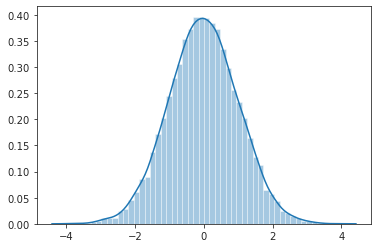

In [23]:
_ = sns.distplot(x)

When the normal distribution has a mean ($\mu$) of zero and standard deviation ($\sigma$) of one, as it does by default with the NumPy `normal()` method...

In [24]:
np.mean(x)

-0.01626305454909193

In [25]:
np.std(x)

1.0039756140435032

...it is a **standard normal distribution** (a.k.a., standard Gaussian distribution).

Normal distributions are by far the most common distribution in statistics and machine learning. They are typically the default option, particularly if you have limited information about the random process you're modeling, because: 

1. Normal distributions assume the greatest possible uncertainty about the random variable they represent (relative to any other distribution of equivalent variance). Details of this are beyond the scope of this tutorial. 
2. Simple and very complex random processes alike are, under all common conditions, normally distributed when we sample values from the process. Since we sample data for statistical and machine learning models alike, this so-called **central limit theorem** (covered next) is a critically important concept. 

### The Central Limit Theorem

To develop a functional understanding of the CLT, let's sample some values from our normal distribution:

In [26]:
x_sample = np.random.choice(x, size=10, replace=False)
x_sample

array([-0.10069587,  1.35557294,  0.66536894, -3.17042574,  0.43948605,
        0.53629091, -1.04552949, -0.99434937, -0.74023225, -0.54129909])

The mean of a sample isn't always going to be close to zero with such a small sample:

In [27]:
np.mean(x_sample)

-0.35958129882198664

Let's define a function for generating **sampling distributions** of the mean of a given input distribution:

In [28]:
def sample_mean_calculator(input_dist, sample_size, n_samples):
    sample_means = []
    for i in range(n_samples):
        sample = np.random.choice(input_dist, size=sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    return sample_means

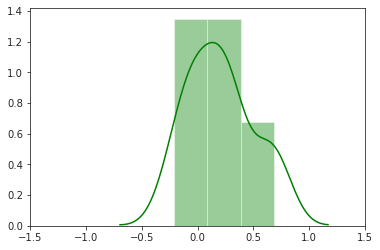

In [29]:
sns.distplot(sample_mean_calculator(x, 10, 10), color='green')
_ = plt.xlim(-1.5, 1.5)

The more samples we take, the more likely that the sampling distribution of the means will be normally distributed: 

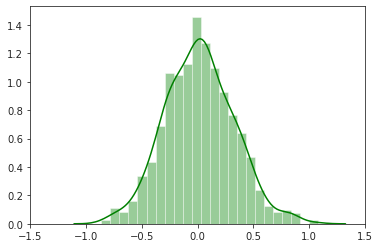

In [30]:
sns.distplot(sample_mean_calculator(x, 10, 1000), color='green')
_ = plt.xlim(-1.5, 1.5)

The larger the sample, the tighter the sample means will tend to be around the population mean:

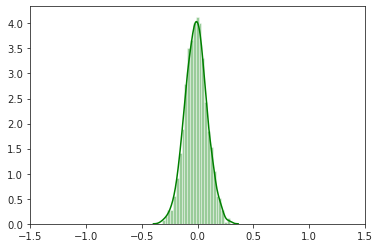

In [31]:
sns.distplot(sample_mean_calculator(x, 100, 1000), color='green')
_ = plt.xlim(-1.5, 1.5)

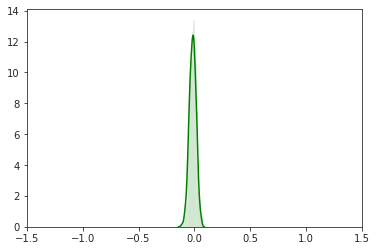

In [32]:
sns.distplot(sample_mean_calculator(x, 1000, 1000), color='green')
_ = plt.xlim(-1.5, 1.5)

#### Sampling from a skewed distribution

In [33]:
s = skewnorm.rvs(10, size=10000)

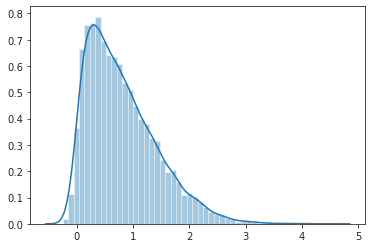

In [34]:
_ = sns.distplot(s)

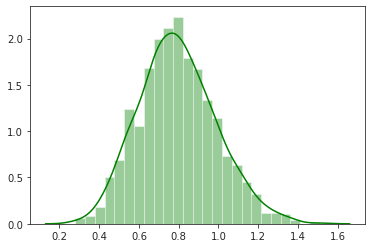

In [35]:
_ = sns.distplot(sample_mean_calculator(s, 10, 1000), color='green')

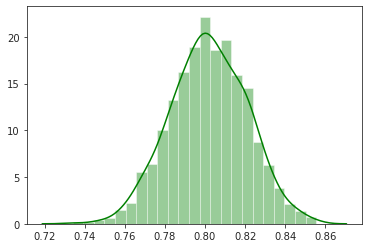

In [36]:
_ = sns.distplot(sample_mean_calculator(s, 1000, 1000), color='green')

#### Sampling from a multimodal distribution

In [37]:
m = np.concatenate((np.random.normal(size=5000), np.random.normal(loc = 4.0, size=5000)))

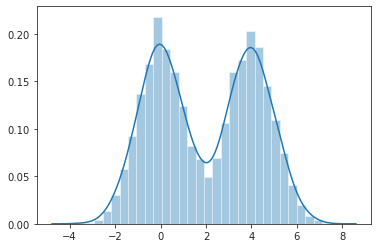

In [38]:
_ = sns.distplot(m)

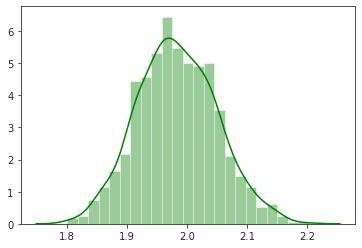

In [39]:
_ = sns.distplot(sample_mean_calculator(m, 1000, 1000), color='green')

#### Sampling from uniform

Even sampling from the highly non-normal uniform distribution, the sampling distribution comes out normal: 

In [47]:
u = np.random.uniform(size=10000)

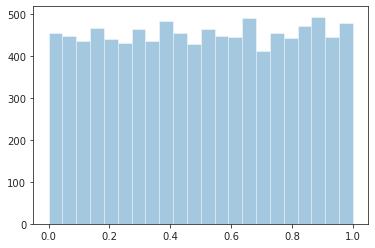

In [48]:
_ = sns.distplot(u, kde=False)

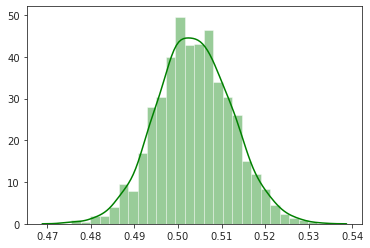

In [49]:
_ = sns.distplot(sample_mean_calculator(u, 1000, 1000), color='green')

Therefore, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed, allowing us to apply statistical and ML models that are configured for normally distributed noise, which is often the default assumption.

As an example, the "t-test" (covered shortly in *Intro to Stats*) allows us to infer whether two samples come from different populations (say, an experimental group that receives a treatment and a control group that receives a placebo). Thanks to the CLT, we can use this test even if we have no idea what the underlying distribution of the populations being tested are, which may be the case more frequently than not. 